# Getting started with Logistic Regression in Python

Predicting binary outcome.

 

## Introduction
 - Logistic regression involves solving a classification problem. A classification problem is a predictive modeling problem where the class label is anticipated for a specific example of input data.
  - It's importance is when we are predicting binary outcome variables like patients with diabetes or not, spam email or not, structures will fail or stay standing among others based on their scores on a set of potential predictor variables.
 

## 1. Understanding Logistic regression
- Binary logistic regression models the relationship between a set of independent variables and a binary dependent variable. It is useful when the dependent variable is dichotomous in nature, like death or survival, absence or presence and so on.
-  It uses the logistic (sigmoid) activation function, which maps the linear combination of predictor variables to a probability value between 0 and 1.

### Example Logistic regression

In [36]:
# Imports 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, \
    roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
# Load the data
diabetes_df = pd.read_csv('../data/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
#  Splitting the data into features and labels
X= diabetes_df.drop('Outcome', axis=1)
y=diabetes_df['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [12]:
# Model development and prediction

# Instantiate the model
logreg = LogisticRegression()

# Fit teh model
logreg.fit(X_train, y_train)

# Predict labels
y_pred = logreg.predict(X_test)

[[95 28]
 [24 45]]


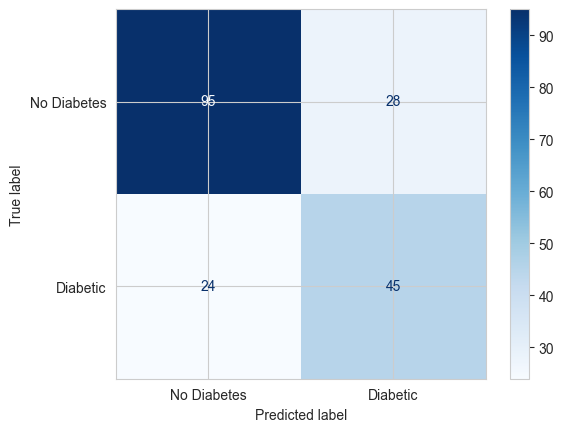

In [32]:
# Evaluate the model
cnf_matrix = confusion_matrix(y_test, y_pred)

labels = ['No Diabetes','Diabetic']
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,display_labels=labels)
print(cnf_matrix)
disp.plot(cmap=plt.cm.Blues)

In [33]:
# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7291666666666666


In [34]:
# classification report
cls_report = classification_report(y_test,y_pred,target_names=labels)
print(cls_report)

              precision    recall  f1-score   support

 No Diabetes       0.80      0.77      0.79       123
    Diabetic       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



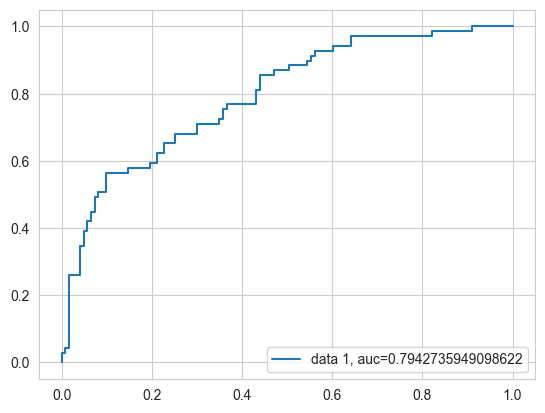

In [37]:
# Receiver Operating Curve (ROC)
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

AUC score for the case is 0.79. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.